# IMPORTS

In [2]:
from glob import glob
import os, pandas as pd
import cv2, numpy as np
import matplotlib.pyplot as plt
# from segmentation_models import *
# from segmentation_models.metrics import iou_score
import shutil
import pickle

/tmp/ipykernel_8467/1091163936.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import os, pandas as pd


In [53]:
df = pd.read_csv('dataset/CXR8/Data_Entry_2017_v2020.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [24]:
len(os.listdir("/home/lucas/dataset_chest/classificacao_multilabel_chest/dataset/CXR8/images/images_011/images"))

10000

In [3]:
img_paths={os.path.basename(x): x for x in glob(os.path.join('.', 'dataset/CXR8/images', 'images*','images','*.png'))} 
len(img_paths)

112120

In [5]:
df['path']=df['Image Index'].map(img_paths.get) #mapping image ids to all image paths

In [6]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,None
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,None
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,None
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,None
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,None
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168,./dataset/CXR8/images/images_012/images/000308...
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168,./dataset/CXR8/images/images_012/images/000308...
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,./dataset/CXR8/images/images_012/images/000308...
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168,./dataset/CXR8/images/images_012/images/000308...


# <mark>Usando somente 70k de imagens (PODE PULAR)</mark> 

In [ ]:
df_70 = pd.DataFrame(list(img_paths.items()), columns=['Image Index', 'path'])
df_70

,Image Index,path
0,00015114_002.png,/home/lucas/dataset_chest/dataset/images_06/im...
1,00013879_000.png,/home/lucas/dataset_chest/dataset/images_06/im...
2,00015087_002.png,/home/lucas/dataset_chest/dataset/images_06/im...
3,00015425_006.png,/home/lucas/dataset_chest/dataset/images_06/im...
4,00015427_000.png,/home/lucas/dataset_chest/dataset/images_06/im...
...,...,...
69995,00011325_003.png,/home/lucas/dataset_chest/dataset/images_04/im...
69996,00010352_060.png,/home/lucas/dataset_chest/dataset/images_04/im...
69997,00009396_001.png,/home/lucas/dataset_chest/dataset/images_04/im...
69998,00010590_000.png,/home/lucas/dataset_chest/dataset/images_04/im...


In [15]:
merged_df = pd.merge(df_70, df[['Image Index', 'Finding Labels', 'Patient ID']], on='Image Index', how='left')

In [16]:
merged_df

,Image Index,path,Finding Labels,Patient ID
0,00015114_002.png,/home/lucas/dataset_chest/dataset/images_06/im...,Pleural_Thickening,15114
1,00013879_000.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,13879
2,00015087_002.png,/home/lucas/dataset_chest/dataset/images_06/im...,Atelectasis|Consolidation|Infiltration,15087
3,00015425_006.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,15425
4,00015427_000.png,/home/lucas/dataset_chest/dataset/images_06/im...,No Finding,15427
...,...,...,...,...
69995,00011325_003.png,/home/lucas/dataset_chest/dataset/images_04/im...,No Finding,11325
69996,00010352_060.png,/home/lucas/dataset_chest/dataset/images_04/im...,Effusion,10352
69997,00009396_001.png,/home/lucas/dataset_chest/dataset/images_04/im...,No Finding,9396
69998,00010590_000.png,/home/lucas/dataset_chest/dataset/images_04/im...,Atelectasis|Effusion,10590


In [17]:
merged_df.to_csv("dataset_70.csv")

# LEITURA DATAFRAME

In [9]:
df = df.loc[:,['Image Index','Patient ID', 'Finding Labels', 'path']]
df

,Image Index,Patient ID,Finding Labels,path
0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...
1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...
2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...
3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...
4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...
...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...
112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...
112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...
112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...


In [37]:
# def save_masks(pred, names, output):
#     """
#         Salva as máscaras geradas

#         Parameters
#         ----------
#         pred: array-like, float32
#             Array contendo todas as máscaras preditas
#         names: list, 'string'
#             Lista de nomes dos arquivos das imagens
#         output: string
#             Nome do diretório onde as imagens serão salvas
            
#     """
#     for i in range(pred.shape[0]):
#         m = pred[i, :, :, 0]
#         cv2.imwrite(output + names[i] + '.png', 255 * ((m - m.min())/(m.max() - m.min())))

In [ ]:
# batch = []
# names = []
# i = 1
# BACKBONE = 'densenet169'
# name = 'Unet'
# # model = Unet(BACKBONE, input_shape=(512, 512, 3), classes=1)
# # model.load_weights('/home/lucas_araujo/pibic-2024/classificacao_multilabel_chest/segm_model/segm_models/Unet/weights/densenet169_best_weights.hdf5')
# pre_processing = get_preprocessing(BACKBONE)

# os.makedirs("./mask_chest", exist_ok=True)

# output_dir_base = 'mask_chest/images_'  # Diretório base para salvar as imagens
# output_dir_counter = 0

# for (path, name) in zip(df['path'], df['Image Index']):
#     img = cv2.imread(path)
#     img = cv2.resize(img, (512, 512))
#     batch.append(img)
#     names.append(name)
#     print(f"{i}/1000")
#     if i % 1000 == 0:
#         output_dir = f'{output_dir_base}{output_dir_counter}/'
#         os.makedirs(output_dir, exist_ok=True)

#         batch = np.array(batch)
#         model = Unet(BACKBONE, input_shape=(512, 512, 3), classes=1)
#         model.load_weights('/home/lucas_araujo/pibic-2024/classificacao_multilabel_chest/segm_model/segm_models/Unet/weights/densenet169_best_weights.hdf5')
#         X = pre_processing(batch)
#         pred = model.predict(X, verbose=1)

#         # Salvar masks dentro da pasta específica
#         save_masks(pred, names, output_dir)

#         # Limpar os batches e nomes
#         batch = []
#         names.clear()

#         # Incrementar o contador de diretório
#         output_dir_counter += 1

#     i += 1

# # Processar os dados restantes
# if batch:
#     output_dir = f'{output_dir_base}{output_dir_counter}/'
#     os.makedirs(output_dir, exist_ok=True)

#     batch = np.array(batch)
#     X = pre_processing(batch)
#     pred = model.predict(X, verbose=1)

#     # Salvar masks dentro da pasta específica
#     save_masks(pred, names, output_dir)

# Gerar Crops

In [11]:
len(os.listdir("/home/lucas_araujo/pibic-2024/classificacao_multilabel_chest/mask_chest_crop"))

1000

In [13]:
paths_masks={os.path.basename(x): x for x in glob(os.path.join('.', 'dataset/mask_chest', 'images_*','*.png'))} 
novo_path_masks = {chave.replace('.png.png', '.png'): valor for chave, valor in paths_masks.items()}
novo_path_masks
df['path_masks']=df['Image Index'].map(novo_path_masks.get) #mapping image ids to all image paths
# labels = df['Finding Labels'].str.get_dummies('|')
# df = pd.concat([df, labels], axis=1)

In [14]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks
0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_000.png...
1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_001.png...
2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_002.png...
3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000002_000.png...
4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000003_001.png...
...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030801_001.p...
112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030802_000.p...
112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030803_000.p...
112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030804_000.p...


## Visualizar original, Máscara, Crop

In [15]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks
0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_000.png...
1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_001.png...
2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_002.png...
3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000002_000.png...
4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000003_001.png...
...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030801_001.p...
112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030802_000.p...
112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030803_000.p...
112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030804_000.p...


[  0 255]


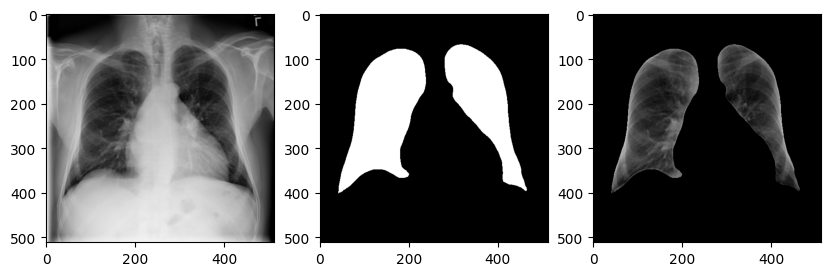

[  0 255]


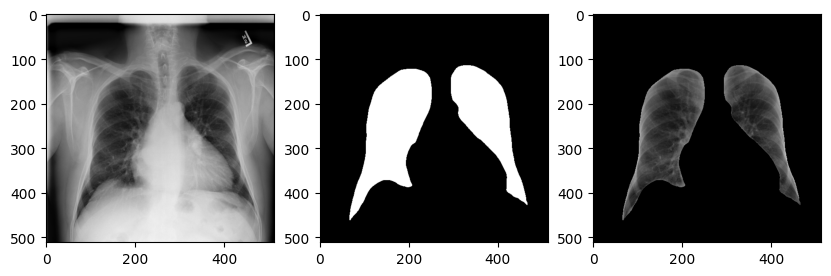

[  0 255]


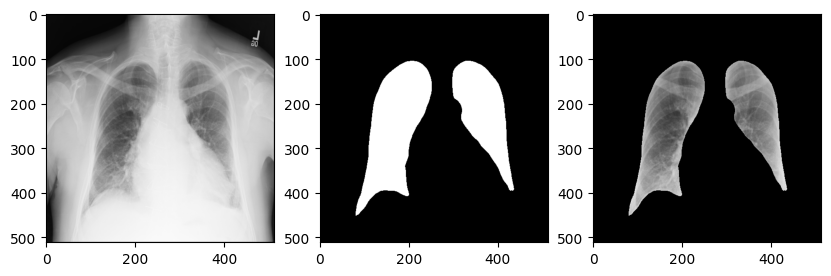

[  0 255]


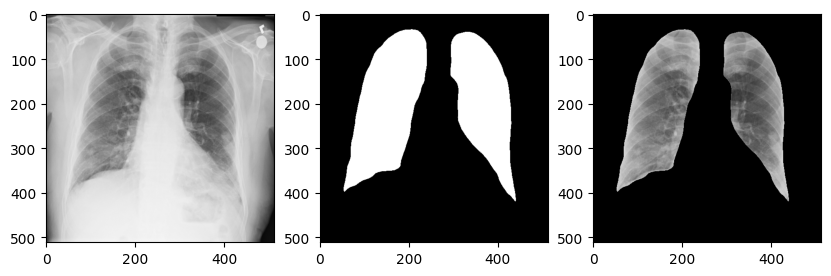

In [16]:
i=0
for (path, mask_path) in zip(df['path'], df['path_masks']):
    image = cv2.imread(path)
    mask = cv2.imread(mask_path)
    # image = image.astype('uint8')
    # mask = mask.astype('uint8')
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, thresholded_mask = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)
    print(np.unique(thresholded_mask))

    image = cv2.resize(image, (mask.shape[1], mask.shape[0]))
    # mask_2 = cv2.bitwise_not(mask_gray)

    Mask = cv2.bitwise_and(image, image, mask = thresholded_mask)  
    plt.figure(figsize=(10, 5))  # Ajuste o tamanho conforme necessário

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Converte de BGR para RGB para o matplotlib

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(thresholded_mask, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(Mask, cv2.COLOR_BGR2RGB))
    plt.show()

    i+=1
    if(i==4):
        break

# Salvando Crops em disco

In [17]:
i=0
output_dir_base = "dataset/mask_chest_crop/"
os.makedirs(output_dir_base, exist_ok=True)
for (name, path, mask_path) in zip(df['Image Index'],df['path'], df['path_masks']):
    print(f"{i}/112120")
    # if(i==1000):
        # break
    image = cv2.imread(path)
    mask = cv2.imread(mask_path)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, thresholded_mask = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)
    image = cv2.resize(image, (mask.shape[1], mask.shape[0]))

    # Aplicando máscara
    masked_image = cv2.bitwise_and(image, image, mask = thresholded_mask)
    # Salvar as imagens
    cv2.imwrite(os.path.join(output_dir_base, f"{name}"), masked_image)
    i+=1

0/112120
1/112120
2/112120
3/112120
4/112120
5/112120
6/112120
7/112120
8/112120
9/112120
10/112120
11/112120
12/112120
13/112120


libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


14/112120
15/112120
16/112120
17/112120
18/112120
19/112120
20/112120
21/112120
22/112120
23/112120
24/112120
25/112120
26/112120
27/112120
28/112120
29/112120
30/112120
31/112120
32/112120
33/112120
34/112120
35/112120
36/112120
37/112120
38/112120
39/112120
40/112120
41/112120
42/112120
43/112120
44/112120
45/112120
46/112120
47/112120
48/112120
49/112120
50/112120
51/112120
52/112120
53/112120
54/112120
55/112120
56/112120
57/112120
58/112120
59/112120
60/112120
61/112120
62/112120
63/112120
64/112120
65/112120
66/112120
67/112120
68/112120
69/112120
70/112120
71/112120
72/112120
73/112120
74/112120
75/112120
76/112120
77/112120
78/112120
79/112120
80/112120
81/112120
82/112120
83/112120
84/112120
85/112120
86/112120
87/112120
88/112120
89/112120
90/112120
91/112120
92/112120
93/112120
94/112120
95/112120
96/112120
97/112120
98/112120
99/112120
100/112120
101/112120
102/112120
103/112120
104/112120
105/112120
106/112120
107/112120
108/112120
109/112120
110/112120
111/112120
112/1121

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


10977/112120
10978/112120
10979/112120
10980/112120
10981/112120
10982/112120
10983/112120
10984/112120
10985/112120
10986/112120
10987/112120
10988/112120
10989/112120
10990/112120
10991/112120
10992/112120
10993/112120
10994/112120
10995/112120
10996/112120
10997/112120
10998/112120
10999/112120
11000/112120
11001/112120
11002/112120
11003/112120
11004/112120
11005/112120
11006/112120
11007/112120
11008/112120
11009/112120
11010/112120
11011/112120
11012/112120
11013/112120
11014/112120
11015/112120
11016/112120
11017/112120
11018/112120
11019/112120
11020/112120
11021/112120
11022/112120
11023/112120
11024/112120
11025/112120
11026/112120
11027/112120
11028/112120
11029/112120
11030/112120
11031/112120
11032/112120
11033/112120
11034/112120
11035/112120
11036/112120
11037/112120
11038/112120
11039/112120
11040/112120
11041/112120
11042/112120
11043/112120
11044/112120
11045/112120
11046/112120
11047/112120
11048/112120
11049/112120
11050/112120
11051/112120
11052/112120
11053/112120

# Juntar Dataframe(Imagens Globais e Crops)

In [27]:
df

,Image Index,Patient ID,Finding Labels,path,path_masks,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00015114_002.png,15114,Pleural_Thickening,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,00013879_000.png,13879,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_55...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,00015087_002.png,15087,Atelectasis|Consolidation|Infiltration,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_61...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00015425_006.png,15425,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00015427_000.png,15427,No Finding,/home/lucas/dataset_chest/dataset/images_06/im...,/home/lucas/dataset_chest/mask_chest/images_62...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,00011325_003.png,11325,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_43...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69996,00010352_060.png,10352,Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_39...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69997,00009396_001.png,9396,No Finding,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_35...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
69998,00010590_000.png,10590,Atelectasis|Effusion,/home/lucas/dataset_chest/dataset/images_04/im...,/home/lucas/dataset_chest/mask_chest/images_40...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [20]:
paths_crops={os.path.basename(x): x for x in glob(os.path.join('.', 'dataset/mask_chest_crop','*.png'))}
paths_crops 
df['path_crop']=df['Image Index'].map(paths_crops.get) #mapping image ids to all image paths
df

,Image Index,Patient ID,Finding Labels,path,path_masks,path_crop
0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_000.png...,./dataset/mask_chest_crop/00000001_000.png
1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_001.png...,./dataset/mask_chest_crop/00000001_001.png
2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_002.png...,./dataset/mask_chest_crop/00000001_002.png
3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000002_000.png...,./dataset/mask_chest_crop/00000002_000.png
4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000003_001.png...,./dataset/mask_chest_crop/00000003_001.png
...,...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030801_001.p...,./dataset/mask_chest_crop/00030801_001.png
112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030802_000.p...,./dataset/mask_chest_crop/00030802_000.png
112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030803_000.p...,./dataset/mask_chest_crop/00030803_000.png
112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030804_000.p...,./dataset/mask_chest_crop/00030804_000.png


# One Hot Encoding

In [21]:
labels = df['Finding Labels'].str.get_dummies('|')
df = pd.concat([df, labels], axis=1)
df

,Image Index,Patient ID,Finding Labels,path,path_masks,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_000.png...,./dataset/mask_chest_crop/00000001_000.png,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_001.png...,./dataset/mask_chest_crop/00000001_001.png,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_002.png...,./dataset/mask_chest_crop/00000001_002.png,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000002_000.png...,./dataset/mask_chest_crop/00000002_000.png,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000003_001.png...,./dataset/mask_chest_crop/00000003_001.png,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030801_001.p...,./dataset/mask_chest_crop/00030801_001.png,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030802_000.p...,./dataset/mask_chest_crop/00030802_000.png,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030803_000.p...,./dataset/mask_chest_crop/00030803_000.png,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030804_000.p...,./dataset/mask_chest_crop/00030804_000.png,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
df.to_csv("df_ori_mask_crop.csv")

In [23]:
df[df.isnull().any(axis=1)]

,Image Index,Patient ID,Finding Labels,path,path_masks,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax


# Dataloaders

In [21]:
df

,Image Index,Patient ID,Finding Labels,path,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,Cardiomegaly,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,Cardiomegaly|Emphysema,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,Cardiomegaly|Effusion,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,3,Hernia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,30801,Mass|Pneumonia,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,30802,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,30803,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,30804,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
df_experimento = df.sample(n=100)
df_experimento

,Image Index,Patient ID,Finding Labels,path,path_crop,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
51675,00013049_010.png,13049,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12702,00003333_002.png,3333,Infiltration|Mass,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
104939,00028148_004.png,28148,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
83243,00020438_009.png,20438,Atelectasis|Consolidation,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99352,00026278_001.png,26278,Pneumothorax,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,00011925_043.png,11925,Effusion|Mass,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
52761,00013307_007.png,13307,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41184,00010674_001.png,10674,No Finding,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
67611,00016715_009.png,16715,Edema,/home/lucas_araujo/pibic-2024/dataset/images_0...,/home/lucas_araujo/pibic-2024/dataset_segm/mas...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


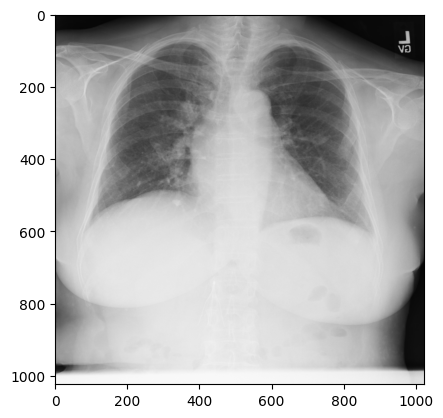

In [45]:
for path in df_experimento['path']:
    img = cv2.imread(path)
    # print(img)
    # print(np.unique(img))
    plt.imshow(img)
    break

In [23]:
labels = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Effusion",
    "Emphysema",
    "Fibrosis",
    "Hernia",
    "Infiltration",
    "Mass",
    "No Finding",
    "Nodule",
    "Pleural_Thickening",
    "Pneumonia",
    "Pneumothorax"] 

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization= True
)
generator = datagen.flow_from_dataframe(
    dataframe=df_experimento,
    directory=None,
    x_col='path_crop',
    y_col=labels,
    class_mode="raw",
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
)
x, y = generator.__getitem__(0)

Found 100 validated image filenames.


# Contar classes

In [4]:
df = pd.read_csv("/home/lucas/dataset_chest/classificacao_multilabel_chest/df_ori_mask_crop.csv")

In [6]:
df_5000 = df.sample(n=5000)

In [8]:
df_5000.to_csv("df_5000")

In [10]:
labels = df['Finding Labels'].str.split('|').sum()

In [9]:
from collections import Counter

labels = df['Finding Labels'].str.split('|').sum()
label_counts = Counter(labels)

for label, count in label_counts.items():
    print(f"{label}: {count}")


Cardiomegaly: 2776
Emphysema: 2516
Effusion: 13317
No Finding: 60361
Hernia: 227
Infiltration: 19894
Mass: 5782
Nodule: 6331
Atelectasis: 11559
Pneumothorax: 5302
Pleural_Thickening: 3385
Pneumonia: 1431
Fibrosis: 1686
Edema: 2303
Consolidation: 4667


In [14]:
len(df)

112120

In [13]:
len(labels)

141537